In [2]:
library('ggplot2')

In [3]:
library('aTSA')


Attaching package: 'aTSA'


The following object is masked from 'package:graphics':

    identify




In [4]:
library('tseries')

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'tseries'


The following objects are masked from 'package:aTSA':

    adf.test, kpss.test, pp.test




In [5]:
library('urca')

In [6]:
library('vars')

Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: lmtest


Attaching package: 'vars'


The following object is masked from 'package:aTSA':

    arch.test




In [7]:
library('tsDyn')

In [8]:
library('Hmisc')

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units




In [32]:
library('feasts')

Loading required package: fabletools


Attaching package: 'fabletools'


The following object is masked from 'package:tsDyn':

    MAPE


The following objects are masked from 'package:aTSA':

    estimate, forecast




In [29]:
library('tsibble')


Attaching package: 'tsibble'


The following object is masked from 'package:zoo':

    index




In [30]:
library('lubridate')


Attaching package: 'lubridate'


The following object is masked from 'package:tsibble':

    interval


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [43]:
library("ggpubr")

In [88]:
library('dyn')

In [144]:
library('DataCombine')


Attaching package: 'DataCombine'


The following object is masked from 'package:tsibble':

    slide




In [166]:
library(tidyverse)

In [143]:
install.packages('DataCombine')

Installing package into 'C:/Users/pawel/OneDrive/Dokumenty/R/win-library/4.0'
(as 'lib' is unspecified)



package 'DataCombine' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pawel\AppData\Local\Temp\Rtmpq6ysuP\downloaded_packages


In [110]:
# 1. Define simulation parameters
# 1.1. Vector of constants
ka <- matrix(c(0.2,0.2),2,1)

In [112]:
ka

0.2
0.2


In [113]:
# 1.2. Covariance matrix
Omega <- matrix(c(1.0, 0.8, 0.8, 1.0),2,2)

In [3]:
Omega

1.0,0.8
0.8,1.0


In [4]:
ka

0.2
0.2


In [114]:
Om <- chol(Omega)

In [115]:
Om

1,0.8
0,0.6


In [116]:
A1 <- matrix(c(0.3,0.2,0.2,0.3),2,2)

In [117]:
A1

0.3,0.2
0.2,0.3


In [118]:
# 1.4. Simulation matrix
mX <- matrix(0.0, 2, 50)

In [121]:
# 1.5. Initial values
mX[,1] <- c(1.0420, 1.0720)

In [123]:
# 2. VAR(1) simulation
set.seed(123)
mZeta <- matrix(rnorm(2*50),2,50)

In [130]:
mZeta[,2]

[1] 1.55870831 0.07050839

In [126]:
mX[,1]

[1] 1.042 1.072

In [132]:
for (t in 2:ncol(mX))
{ mX[,t] <- ka + A1 %*% mX[,t-1] +t(Om) %*% mZeta[,t] }

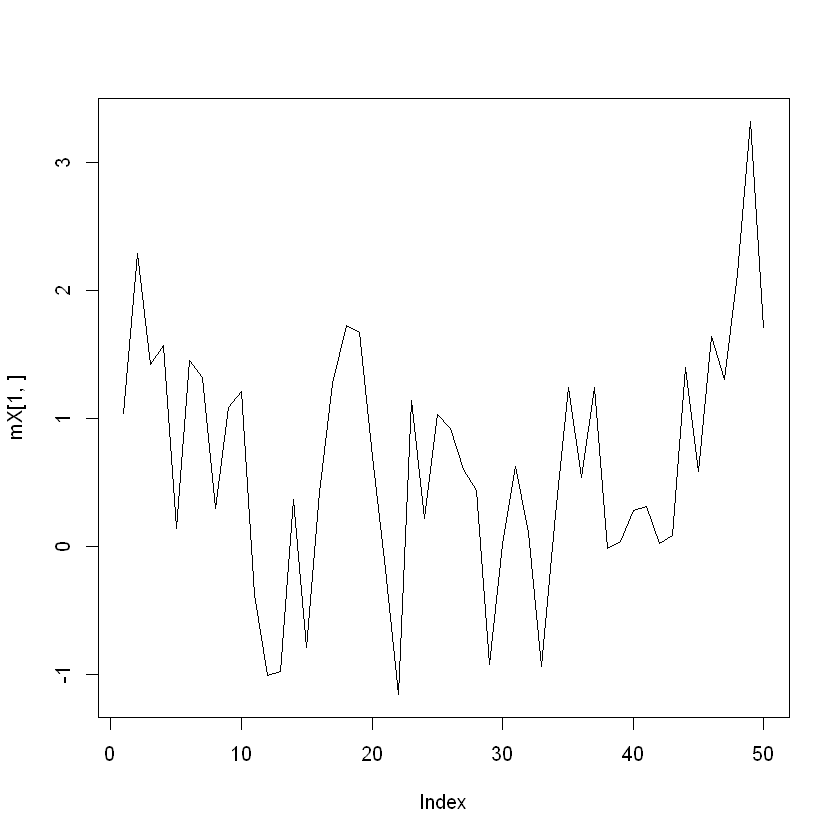

In [133]:
plot(mX[1,], type='l')

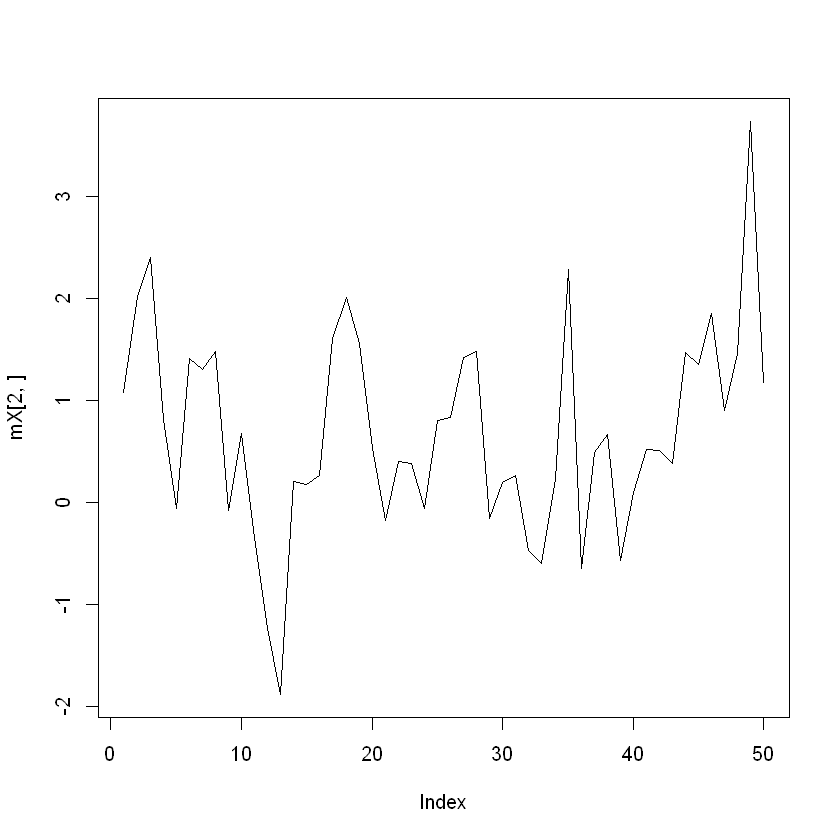

In [134]:
plot(mX[2,], type='l')

In [139]:
macv_init<-read.csv('uk_macv.csv', fileEncoding="UTF-8-BOM")

In [140]:
macv<- macv_init[2:54,]

In [143]:
macv$LN_CPI

[1] 4.593452 4.603311 4.608944 4.614893 4.616626 4.621873 4.626059 4.625188
 [9] 4.628679 4.634338 4.641209 4.650258 4.658876 4.664248 4.669938 4.676321
[17] 4.679305 4.682387 4.684793 4.690664 4.696927 4.701505 4.707985 4.711835
[25] 4.716649 4.723447 4.731573 4.738851 4.744927 4.748656 4.749071 4.759935
[33] 4.768288 4.781628 4.796240 4.798264 4.797522 4.802571 4.811175 4.819153
[41] 4.828915 4.836420 4.842135 4.852244 4.868711 4.879309 4.888942 4.898069
[49] 4.902420 4.906371 4.913186 4.924340 4.929465

In [144]:
adf.test(macv$LN_CPI)


	Augmented Dickey-Fuller Test

data:  macv$LN_CPI
Dickey-Fuller = -1.4107, Lag order = 3, p-value = 0.8117
alternative hypothesis: stationary


In [145]:
macv$LN_GDP_D <- diff(macv_init[,"LN_GDP"], lag = 1)
macv$LN_CPI_D <- diff(macv_init[,"LN_CPI"], lag = 1)
macv$LN_EQ_D <- diff(macv_init[,"LN_EQ"], lag = 1)
macv$LN_FX_D <- diff(macv_init[,"LN_FX"], lag = 1)
macv$IR_S_D <- diff(macv_init[,"IR_S"], lag = 1)
macv$IR_L_D <- diff(macv_init[,"IR_L"], lag = 1)

In [ ]:
VECM <- VECM(macv[, c('LN_GDP','LN_CPI', 'LN_EQ', 'LN_FX', 'IR_S', 'IR_L')], lag = 6, r = 3, estim = 'ML')

In [ ]:
summary(VECM)

In [209]:
# optimal lag
lag <- VARselect(macv[, c('LN_GDP_D','LN_CPI_D', 'LN_EQ_D', 'LN_FX_D', 'IR_S_D', 'IR_L_D')])

In [210]:
lag

,1,2,3,4,5,6,7,8,9,10
AIC(n),-6.303665e+01,-6.248774e+01,-6.200877e+01,-6.322344e+01,-6.522639e+01,-7.160265e+01,-Inf,-Inf,-Inf,-Inf
HQ(n),-6.240228e+01,-6.130962e+01,-6.028690e+01,-6.095783e+01,-6.241703e+01,-6.824954e+01,-Inf,-Inf,-Inf,-Inf
SC(n),-6.131641e+01,-5.929301e+01,-5.733954e+01,-5.707972e+01,-5.760818e+01,-6.250994e+01,-Inf,-Inf,-Inf,-Inf
FPE(n),4.277069e-28,8.179746e-28,1.738783e-27,9.459432e-28,4.525724e-28,1.474534e-29,NaN,0,0,0


In [159]:
# bitcoin

In [192]:
data_ira <- read.csv('C:/Users/pawel/PycharmProjects/quandl/ira.csv')

In [193]:
data_ira$X<-NULL

In [194]:
data_ira$date <- as.Date(data_ira$date)

In [195]:
str(data_ira)

'data.frame':	260 obs. of  3 variables:
 $ date     : Date, format: "2016-01-17" "2016-01-24" ...
 $ change   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ change_bt: num  -0.05571 0.00723 0.00259 -0.03542 0.01854 ...


In [196]:
data_ira <- data_ira %>% 
  rename(
    google_trends_change = change,
    bitcoin_change = change_bt
    )

In [201]:
#Phillips-Perron stationarity test
pptab<-NULL
for(i in 2:ncol(data_ira)){
pp<-PP.test(data_ira[,i])
pptab<-rbind(pptab,pp$p.value)
}
pptab

0.01
0.01


In [202]:
# both time series are stationary at 0.01

`geom_smooth()` using formula 'y ~ x'



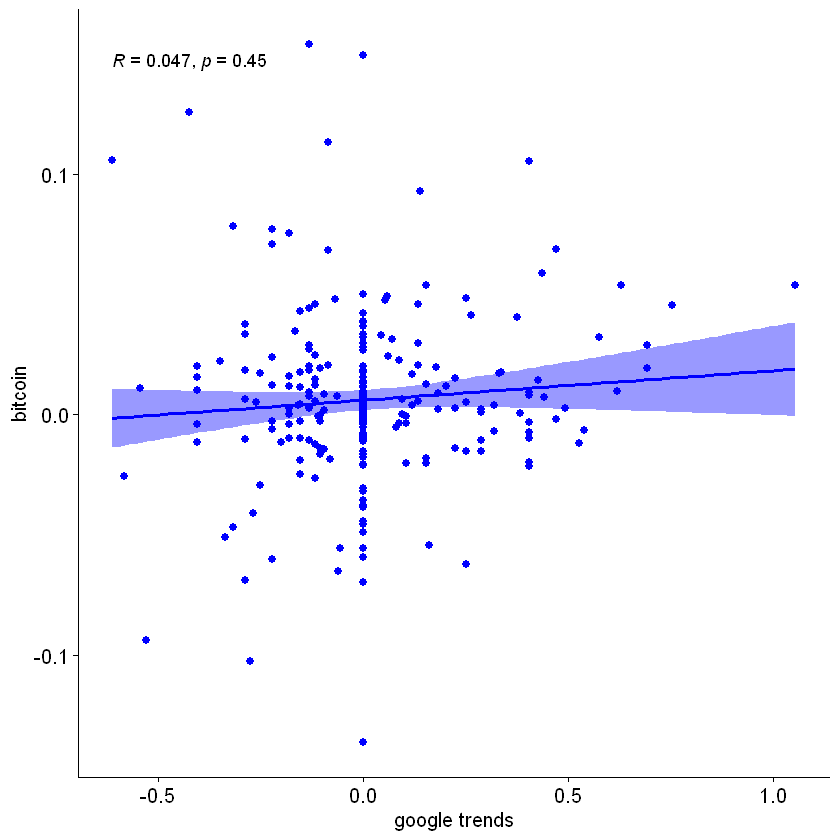

In [203]:
ggscatter(data_ira[2:3], x = "google_trends_change", y = "bitcoin_change",
          color = "blue", cor.coef = TRUE, conf.int = TRUE,
          cor.method = "spearman", add = 'reg.line',
          xlab = "google trends", ylab = "bitcoin")

In [204]:
res <- cor.test(data_ira$google_trends_change, data_ira$bitcoin_change, 
                    method = "pearson")

In [205]:
res


	Pearson's product-moment correlation

data:  data_ira$google_trends_change and data_ira$bitcoin_change
t = 1.3211, df = 258, p-value = 0.1876
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04007991  0.20161652
sample estimates:
       cor 
0.08197345 


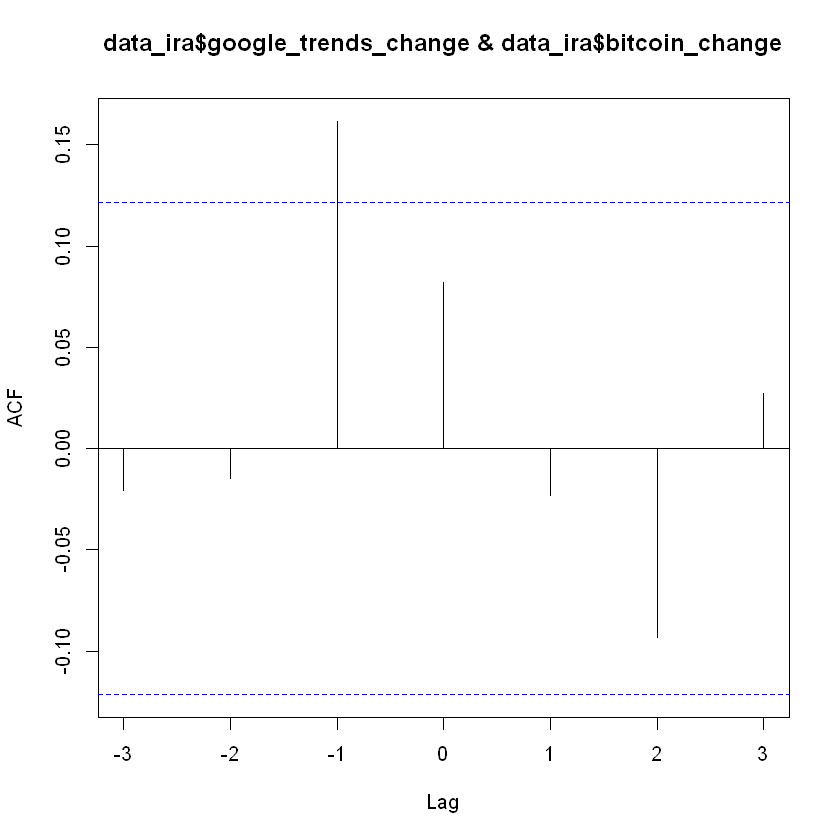

In [206]:
# the correlation between google's trend log(t-1/t-2) and bitcoin log(t/t-1) is statistically significant
ccf (data_ira$google_trends_change, data_ira$bitcoin_change, 3) 

In [207]:
lag_var <- Lag(data_ira$google_trends_change,+1)

In [208]:
data_ira <- cbind(data_ira, lag_var)

In [209]:
lm_model <- lm(bitcoin_change ~ lag_var, data = data_ira)

In [210]:
summary(lm_model)


Call:
lm(formula = bitcoin_change ~ lag_var, data = data_ira)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.136891 -0.014323 -0.001774  0.011584  0.140525 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.006154   0.002104   2.925  0.00375 **
lag_var     0.024475   0.009196   2.661  0.00827 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03382 on 257 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.02682,	Adjusted R-squared:  0.02303 
F-statistic: 7.083 on 1 and 257 DF,  p-value: 0.008274


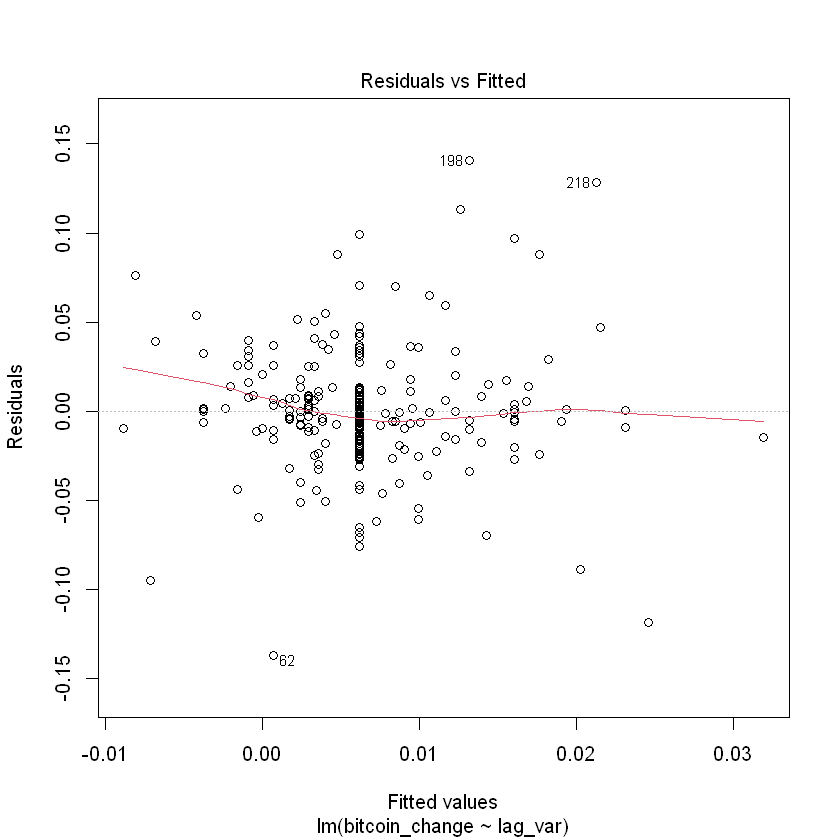

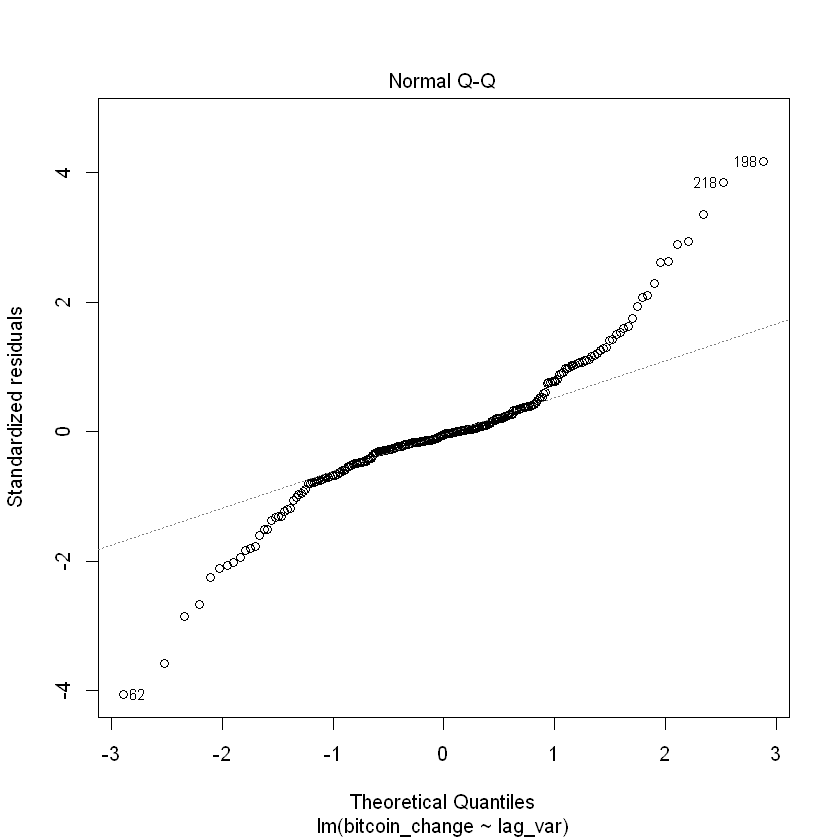

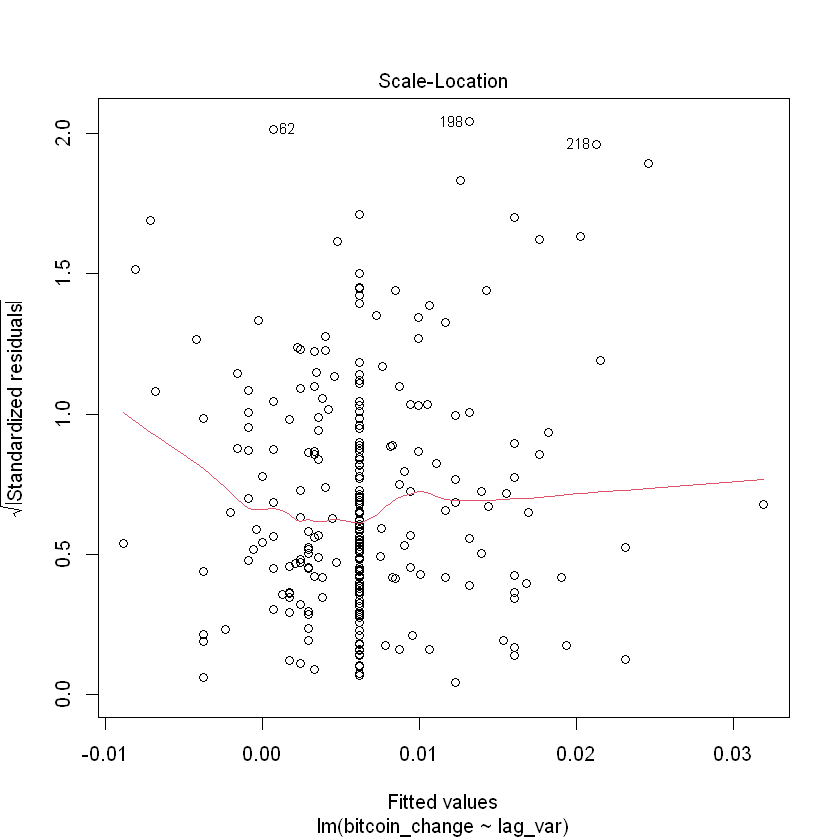

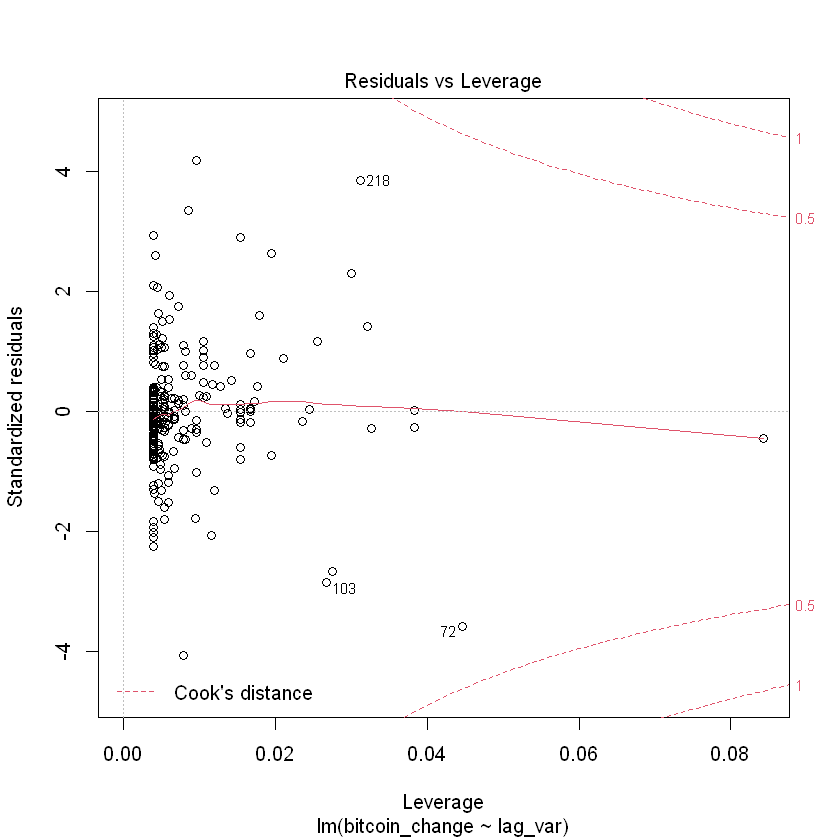

In [211]:
plot(lm_model)

In [212]:
# optimal lag selection
lag_bitcoin <- VARselect(data_ira[, c('google_trends_change','bitcoin_change')])

In [213]:
lag_bitcoin

,1,2,3,4,5,6,7,8,9,10
AIC(n),-9.6452138813,-9.627848e+00,-9.603176e+00,-9.591649e+00,-9.582817e+00,-9.568111e+00,-9.554330e+00,-9.530508e+00,-9.503613e+00,-9.498421e+00
HQ(n),-9.6111990420,-9.571157e+00,-9.523808e+00,-9.489605e+00,-9.458096e+00,-9.420714e+00,-9.384256e+00,-9.337757e+00,-9.288185e+00,-9.260317e+00
SC(n),-9.5606988192,-9.486990e+00,-9.405974e+00,-9.338104e+00,-9.272929e+00,-9.201879e+00,-9.131755e+00,-9.051589e+00,-8.968350e+00,-8.906816e+00
FPE(n),0.0000647348,6.586933e-05,6.751593e-05,6.830093e-05,6.891038e-05,6.993645e-05,7.091408e-05,7.263327e-05,7.462573e-05,7.502964e-05


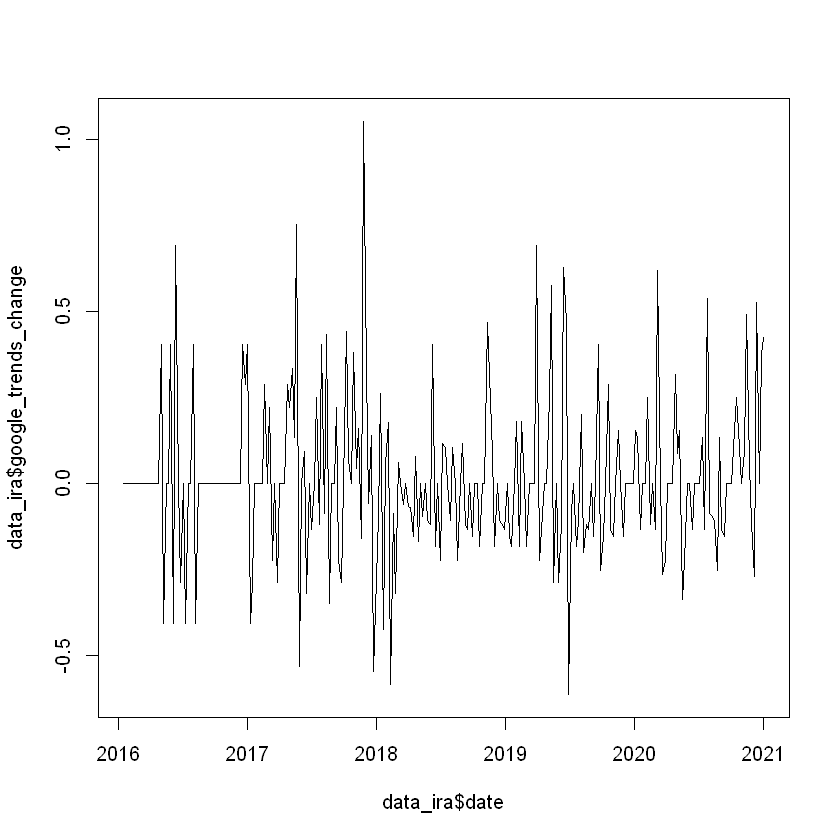

In [214]:
plot(data_ira$date, data_ira$google_trends_change, type = 'l')

In [215]:
data_ira <- DropNA(data_ira, Var='lag_var')

1 rows dropped from the data frame because of missing values.



In [270]:
# Vector Auto-Regression model
VAR_mod <- VAR(data_ira[, c('bitcoin_change', 'google_trends_change')],type = 'const', lag.max = 1, ic = 'SC')

In [271]:
VAR_mod


VAR Estimation Results:

Estimated coefficients for equation bitcoin_change: 
Call:
bitcoin_change = bitcoin_change.l1 + google_trends_change.l1 + const 

      bitcoin_change.l1 google_trends_change.l1                   const 
           -0.044171621             0.025010809             0.006426156 


Estimated coefficients for equation google_trends_change: 
Call:
google_trends_change = bitcoin_change.l1 + google_trends_change.l1 + const 

      bitcoin_change.l1 google_trends_change.l1                   const 
            -0.11456776             -0.08362170              0.01402826 



In [272]:
# granger causality
gc<-causality(VAR_mod,cause = colnames(VAR_mod$datamat[2]))

In [273]:
gc

$Granger

	Granger causality H0: google_trends_change do not Granger-cause
	bitcoin_change

data:  VAR object VAR_mod
F-Test = 7.305, df1 = 1, df2 = 510, p-value = 0.007106


$Instant

	H0: No instantaneous causality between: google_trends_change and
	bitcoin_change

data:  VAR object VAR_mod
Chi-squared = 2.4035, df = 1, p-value = 0.1211



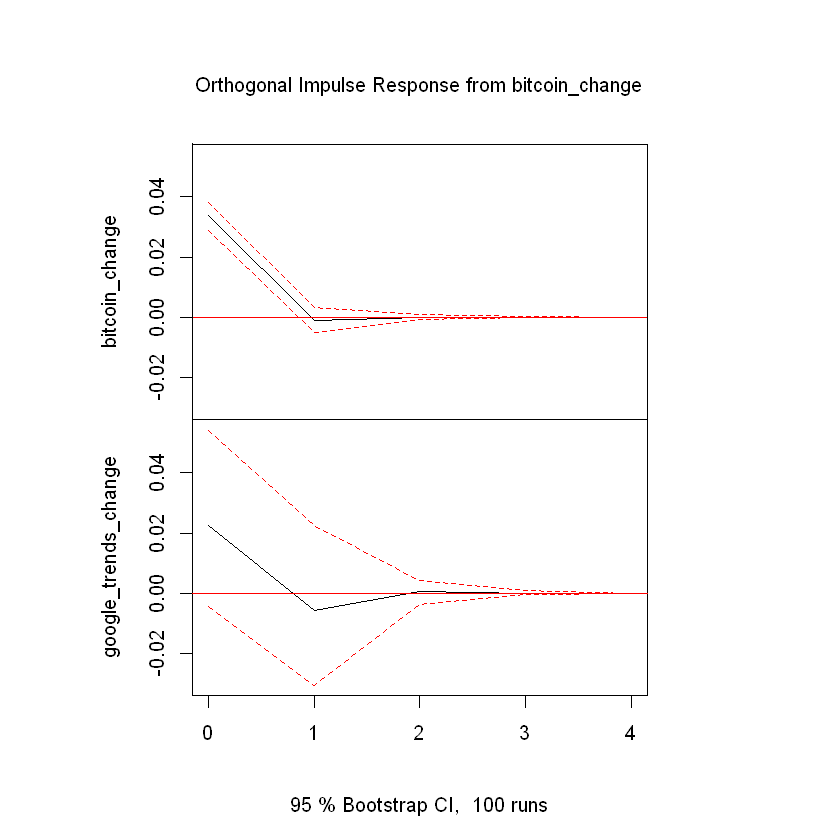

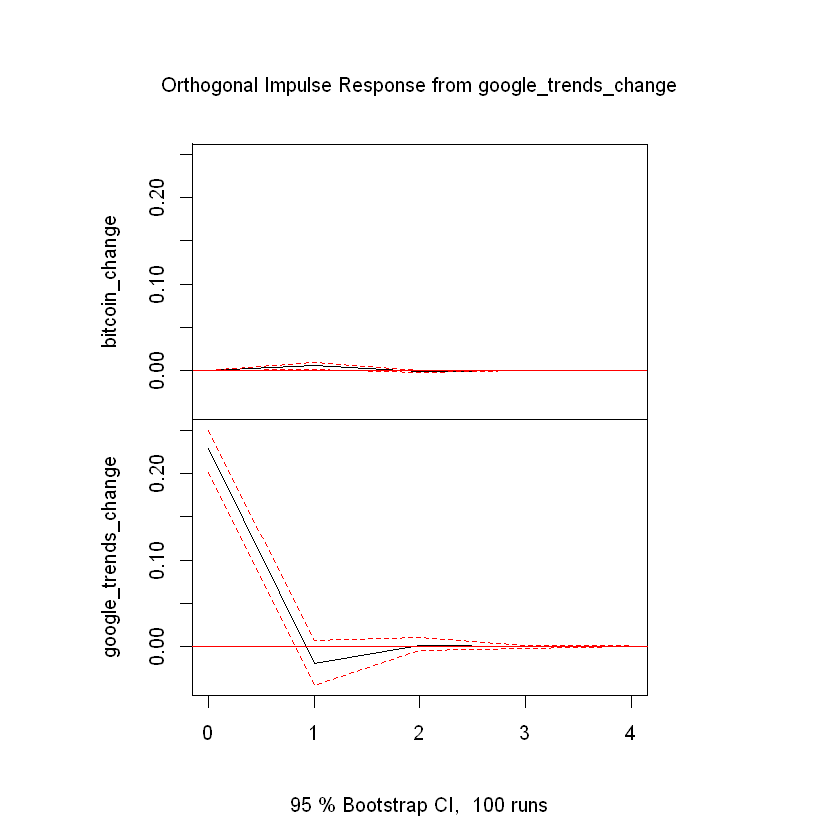

In [251]:
# impulse response function
plot(irf(VAR_mod, n.ahead=4))

In [274]:
# Variance decomposition of forecast errors at 1,2,3,4 weeks horizon
fevd1<-fevd(VAR_mod,n.ahead = 4)

In [275]:
fevd1

$bitcoin_change
     bitcoin_change google_trends_change
[1,]      1.0000000           0.00000000
[2,]      0.9721090           0.02789100
[3,]      0.9716667           0.02833333
[4,]      0.9716641           0.02833591

$google_trends_change
     bitcoin_change google_trends_change
[1,]    0.009403559            0.9905964
[2,]    0.009950423            0.9900496
[3,]    0.009956652            0.9900433
[4,]    0.009956677            0.9900433


In [281]:
fevd2<-fevd1$bitcoin_change

In [282]:
fevdtab<-round(100*fevd2[c(1,2,3,4),],2)

In [283]:
rownames(fevdtab)<-c(1,2,3,4)

In [284]:
print(fevdtab)

  bitcoin_change google_trends_change
1         100.00                 0.00
2          97.21                 2.79
3          97.17                 2.83
4          97.17                 2.83


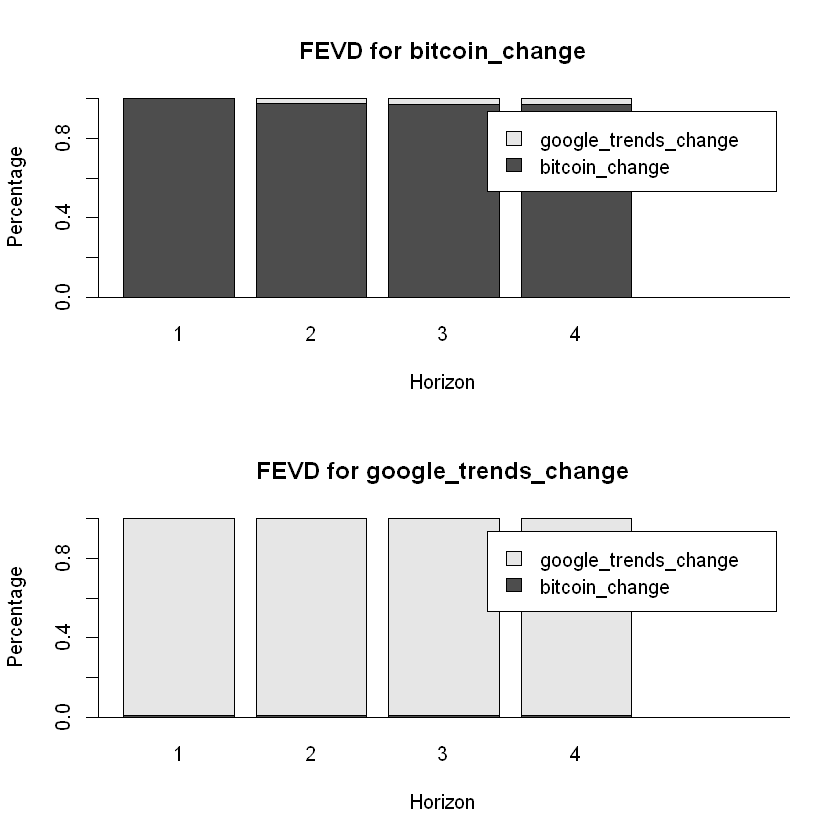

In [285]:
plot(fevd1)

In [286]:
VAR_model <- VAR(macv[, c('LN_GDP_D','LN_CPI_D', 'LN_EQ_D', 'LN_FX_D', 'IR_S_D', 'IR_L_D')],type = 'const', lag.max = 6, ic = 'AIC')

ERROR: Error in as.matrix(y): object 'macv' not found


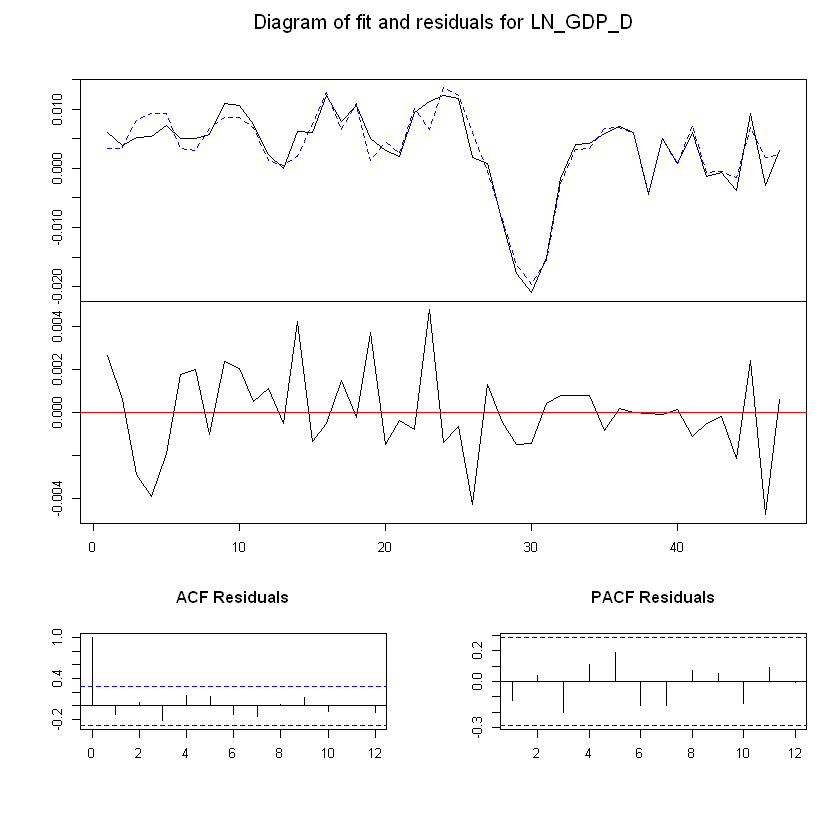

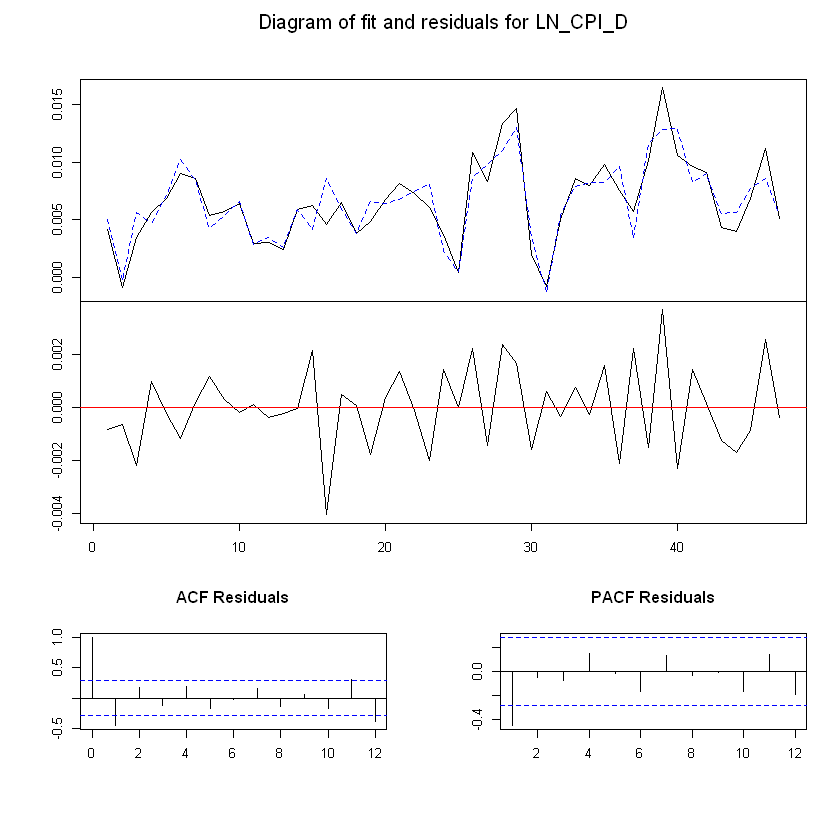

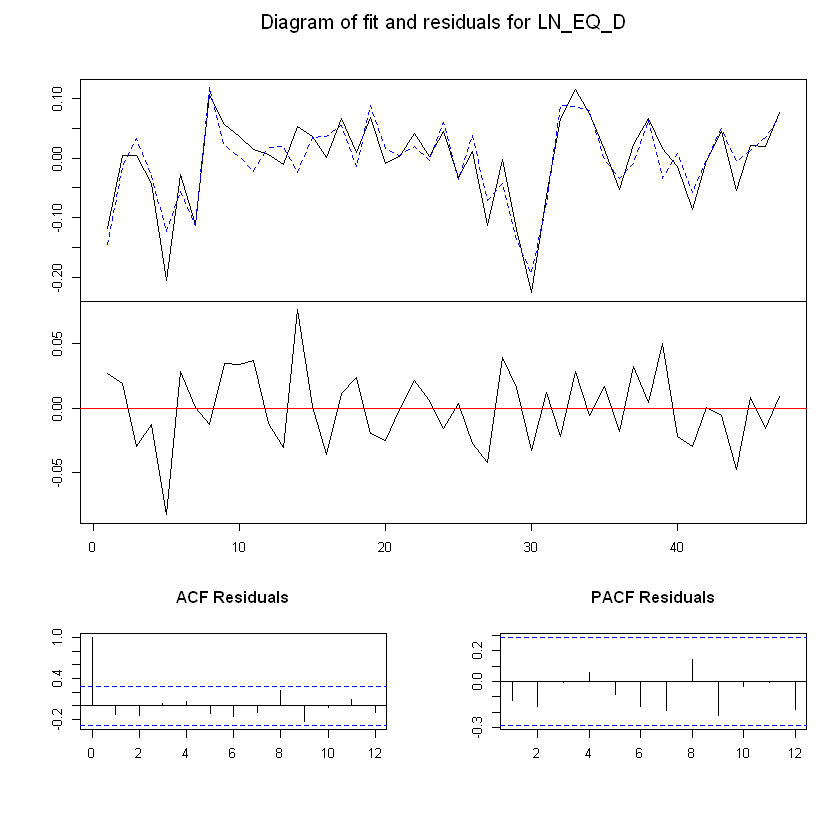

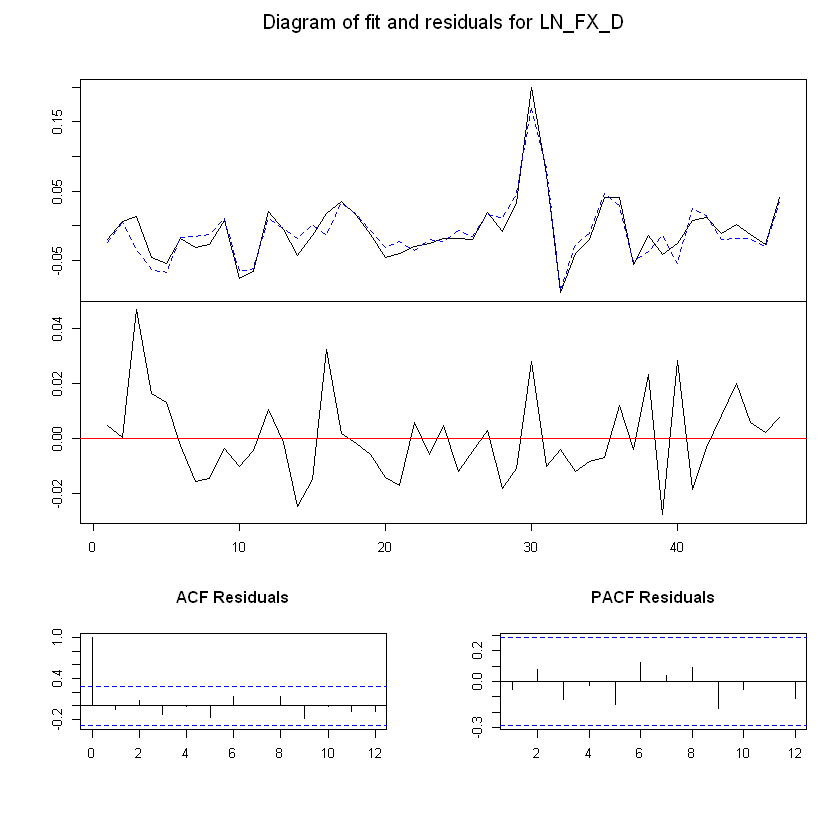

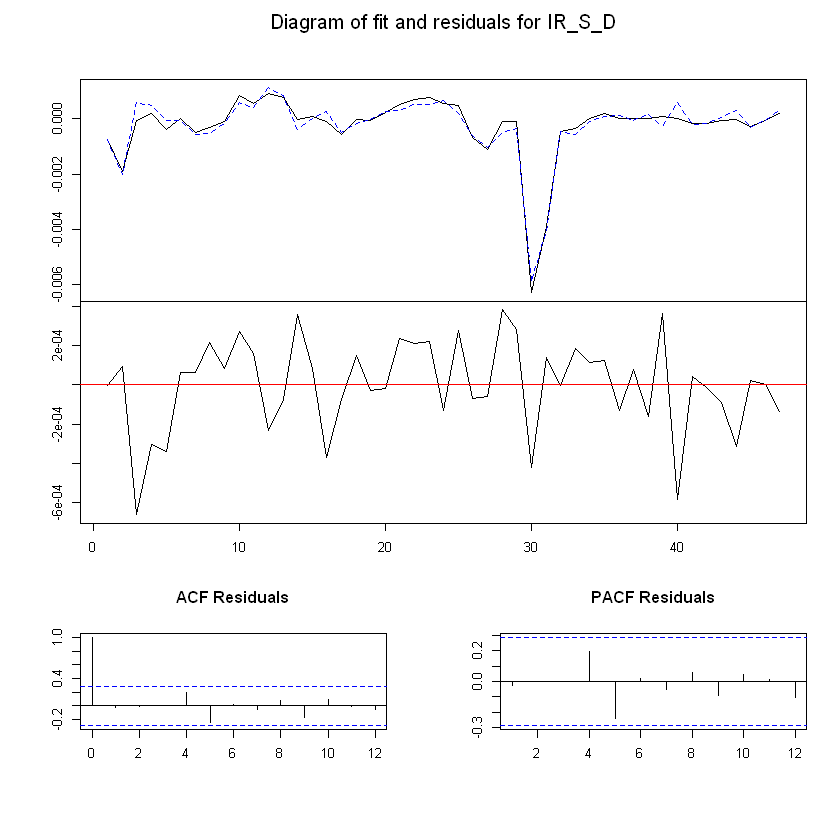

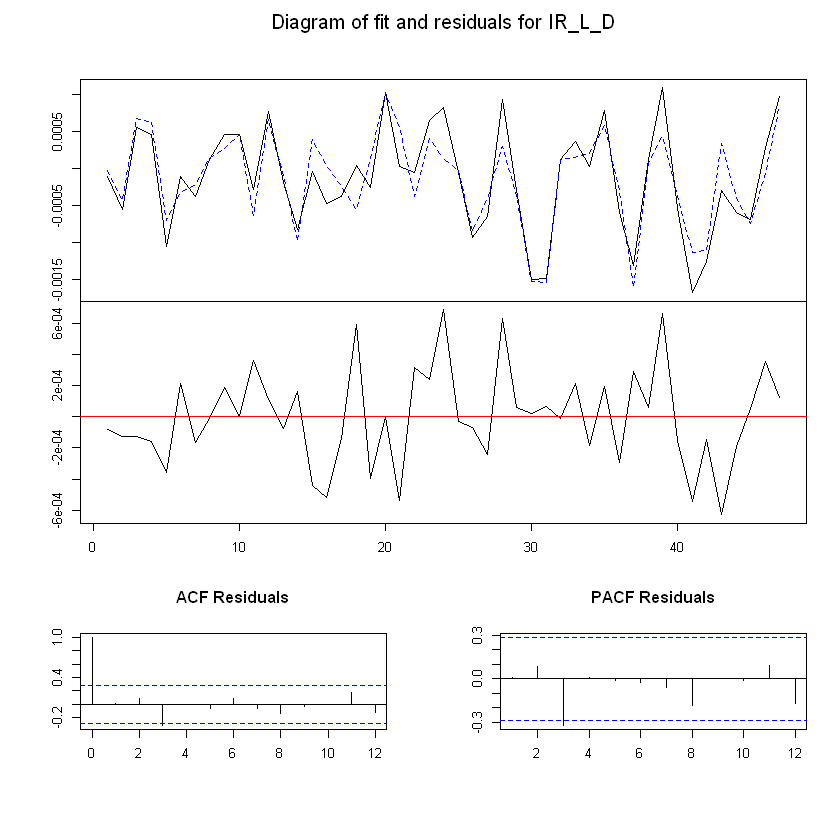

In [225]:
plot(VAR_model)

In [212]:
summary(VAR_model)


VAR Estimation Results:
Endogenous variables: LN_GDP_D, LN_CPI_D, LN_EQ_D, LN_FX_D, IR_S_D, IR_L_D 
Deterministic variables: const 
Sample size: 47 
Log Likelihood: 1454.121 
Roots of the characteristic polynomial:
1.057 1.057 1.013 0.9977 0.9977 0.9965 0.9965 0.9753 0.9753 0.9707 0.9707 0.9693 0.9693 0.9641 0.9641 0.9641 0.9596 0.9596 0.9507 0.9507 0.945 0.945 0.9368 0.9368 0.922 0.922 0.9049 0.9047 0.9047 0.8563 0.8563 0.8208 0.8208 0.647 0.647 0.5652
Call:
VAR(y = macv[, c("LN_GDP_D", "LN_CPI_D", "LN_EQ_D", "LN_FX_D", 
    "IR_S_D", "IR_L_D")], type = "const", lag.max = 6, ic = "AIC")


Estimation results for equation LN_GDP_D: 
LN_GDP_D = LN_GDP_D.l1 + LN_CPI_D.l1 + LN_EQ_D.l1 + LN_FX_D.l1 + IR_S_D.l1 + IR_L_D.l1 + LN_GDP_D.l2 + LN_CPI_D.l2 + LN_EQ_D.l2 + LN_FX_D.l2 + IR_S_D.l2 + IR_L_D.l2 + LN_GDP_D.l3 + LN_CPI_D.l3 + LN_EQ_D.l3 + LN_FX_D.l3 + IR_S_D.l3 + IR_L_D.l3 + LN_GDP_D.l4 + LN_CPI_D.l4 + LN_EQ_D.l4 + LN_FX_D.l4 + IR_S_D.l4 + IR_L_D.l4 + LN_GDP_D.l5 + LN_CPI_D.l5 + LN_EQ_D.

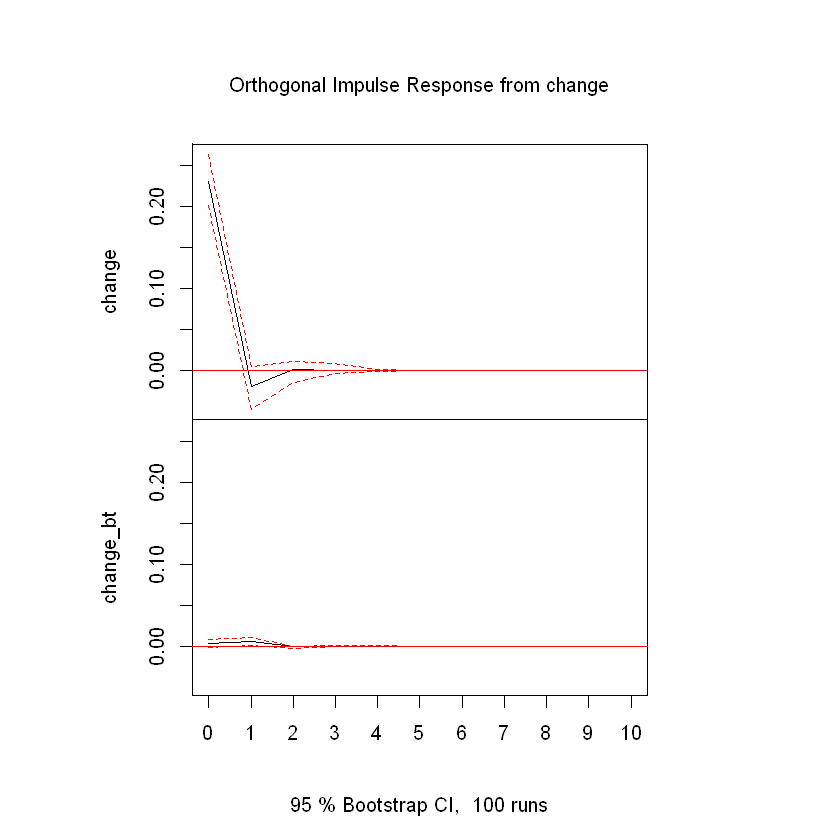

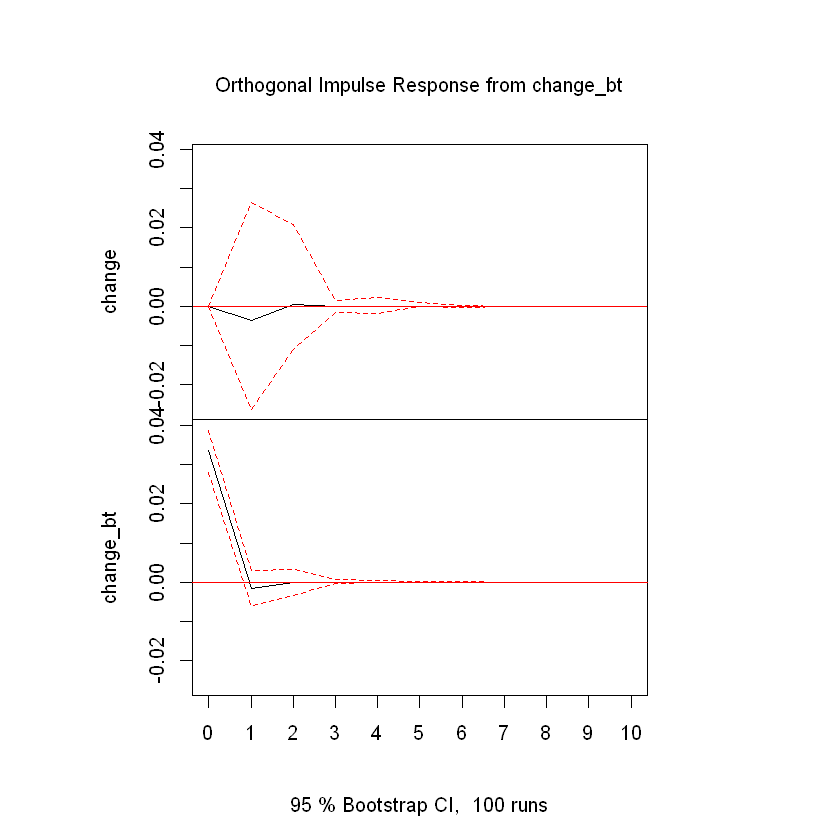

In [34]:
plot(irf(VAR_mod, n.ahead=10))

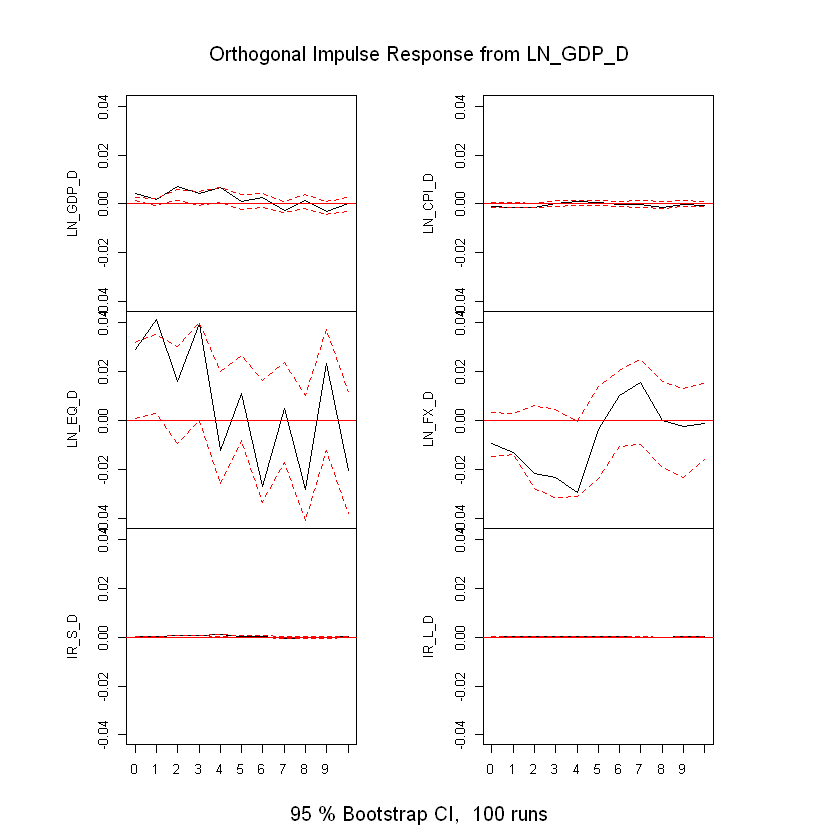

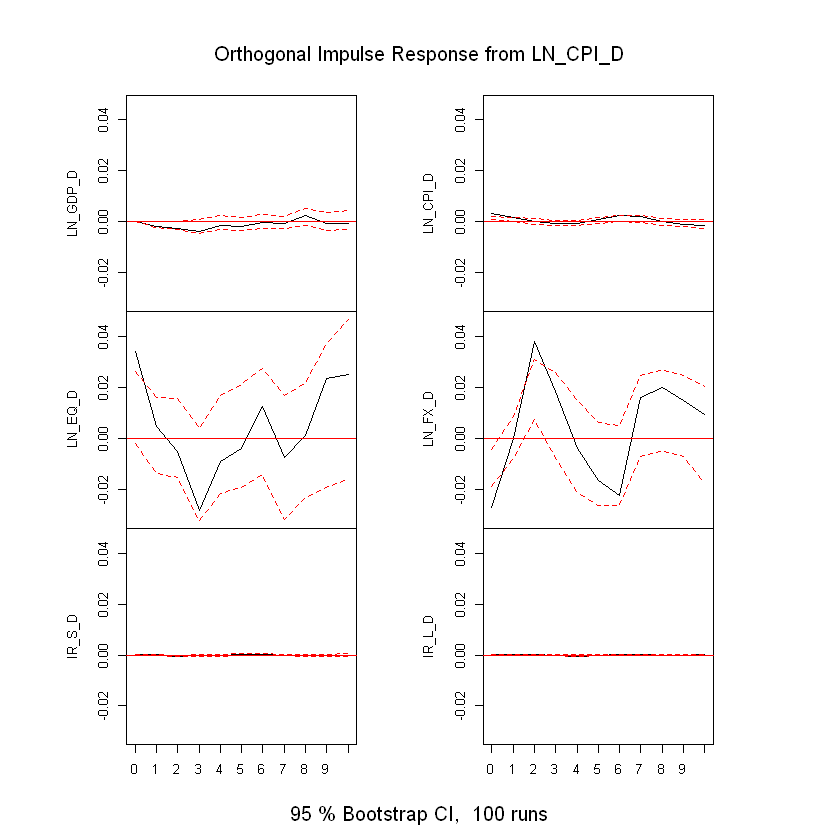

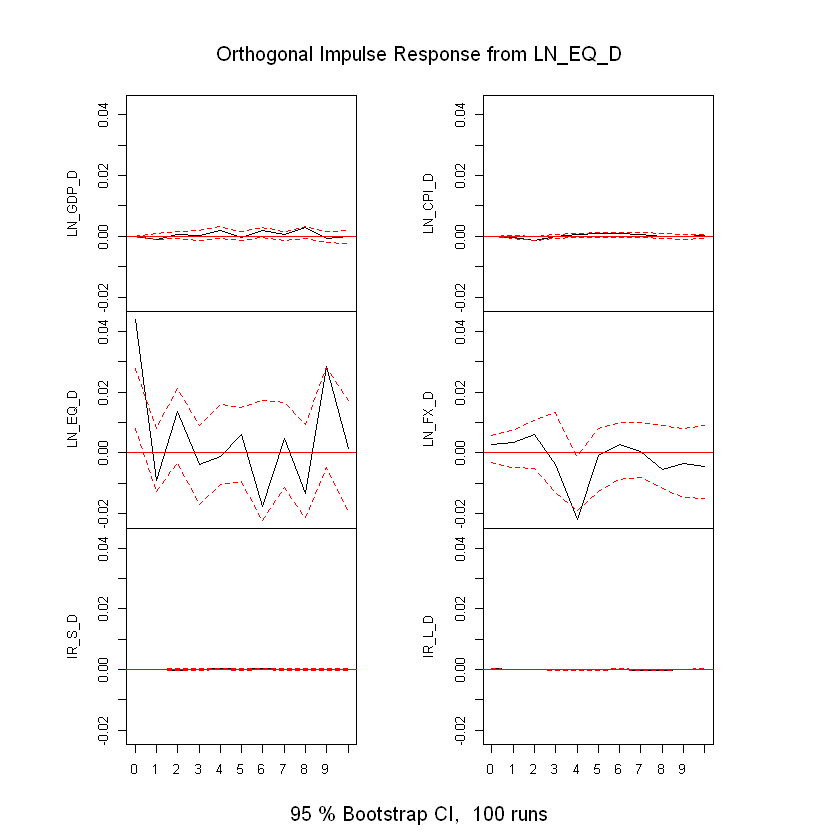

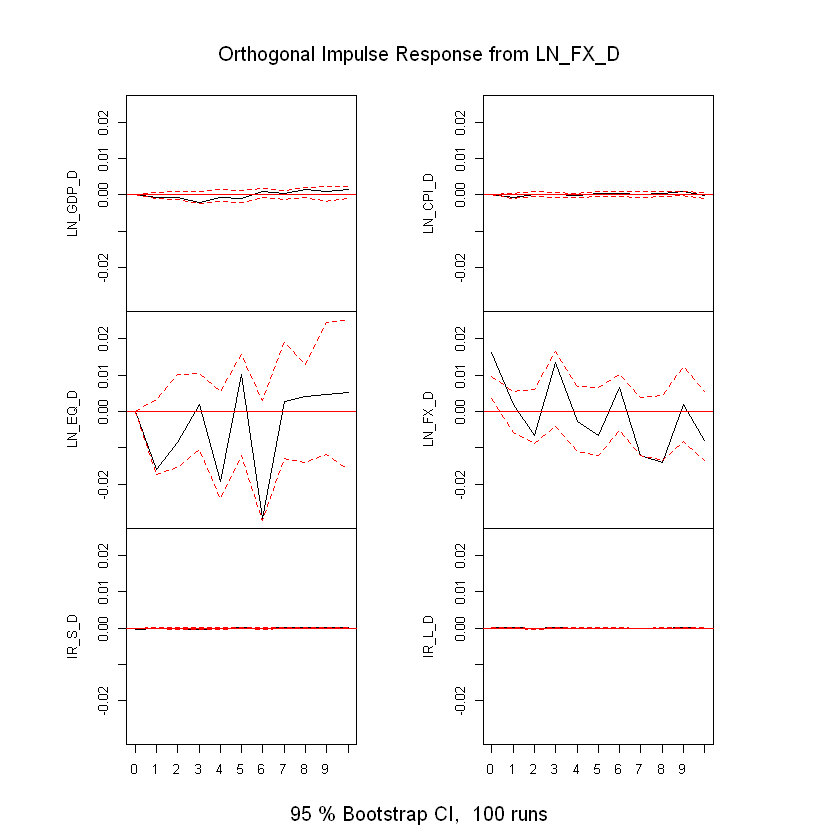

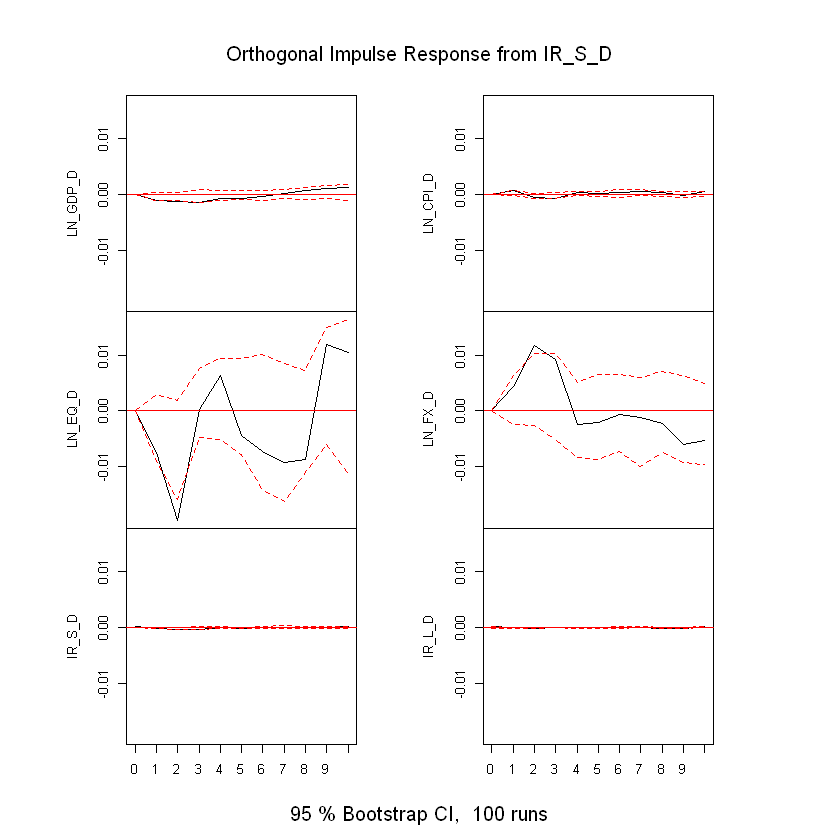

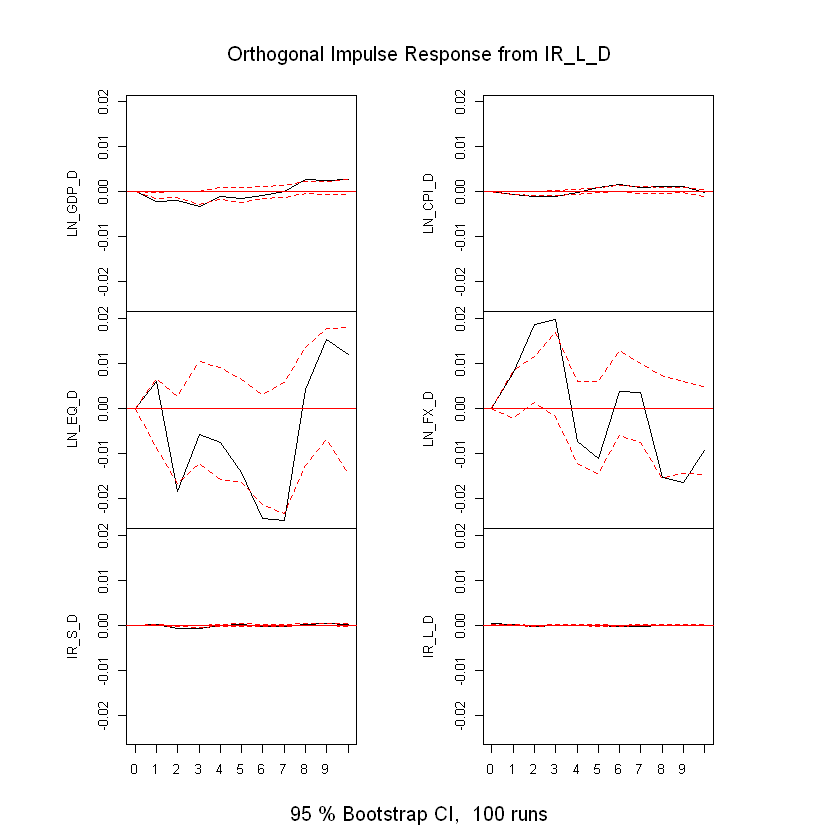

In [213]:
plot(irf(VAR_model, n.ahead=10))

In [167]:
# book methods
VECM2<- ca.jo(macv[, c('LN_GDP_D','LN_CPI_D', 'LN_EQ_D', 'LN_FX_D', 'IR_S_D', 'IR_L_D')], type = 'trace',ecdet='none', K = 2, spec ='transitory')

In [168]:
VECM2_eigen<- ca.jo(macv[, c('LN_GDP_D','LN_CPI_D', 'LN_EQ_D', 'LN_FX_D', 'IR_S_D', 'IR_L_D')], type = 'eigen',ecdet='none', K = 2, spec ='transitory')

In [169]:
summary(VECM2)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.6603430 0.6034759 0.3518141 0.3379879 0.1837329 0.1309659

Values of teststatistic and critical values of test:

           test 10pct  5pct   1pct
r <= 5 |   7.16  6.50  8.18  11.65
r <= 4 |  17.51 15.66 17.95  23.52
r <= 3 |  38.55 28.71 31.52  37.22
r <= 2 |  60.66 45.23 48.28  55.43
r <= 1 | 107.84 66.49 70.60  78.87
r = 0  | 162.91 85.18 90.39 104.20

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            LN_GDP_D.l1   LN_CPI_D.l1   LN_EQ_D.l1  LN_FX_D.l1   IR_S_D.l1
LN_GDP_D.l1    1.000000   1.000000000   1.00000000  1.00000000    1.000000
LN_CPI_D.l1   -3.743363  -1.138889733   3.20531821  1.46425383  -21.843125
LN_EQ_D.l1     1.237039  -0.002193017  -0.25796710  0.03646138    6.210998
LN_FX_D.l1    -5.054971   0.120526305  -0.07423675  0.01927490    6.729164
IR_S_D.l1   -137.616947  -3.7066

In [152]:
summary(VECM2_eigen)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.6603430 0.6034759 0.3518141 0.3379879 0.1837329 0.1309659

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 5 |  7.16  6.50  8.18 11.65
r <= 4 | 10.35 12.91 14.90 19.19
r <= 3 | 21.04 18.90 21.07 25.75
r <= 2 | 22.11 24.78 27.14 32.14
r <= 1 | 47.18 30.84 33.32 38.78
r = 0  | 55.07 36.25 39.43 44.59

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            LN_GDP_D.l1   LN_CPI_D.l1   LN_EQ_D.l1  LN_FX_D.l1   IR_S_D.l1
LN_GDP_D.l1    1.000000   1.000000000   1.00000000  1.00000000    1.000000
LN_CPI_D.l1   -3.743363  -1.138889733   3.20531821  1.46425383  -21.843125
LN_EQ_D.l1     1.237039  -0.002193017  -0.25796710  0.03646138    6.210998
LN_FX_D.l1    -5.054971   0.120526305  -0.07423675  0.01927490    6.729164
IR_S_D.l1   -137.616

In [216]:
vec2var<-vec2var(VECM2,r=3)

In [224]:
vec2var


Coefficient matrix of lagged endogenous variables:

A1:
         LN_GDP_D.l1 LN_CPI_D.l1   LN_EQ_D.l1   LN_FX_D.l1  IR_S_D.l1
LN_GDP_D  0.63418583 -0.25236509  0.028527276  0.013993359 -0.5837001
LN_CPI_D  0.04317199  0.65200897  0.006340481 -0.015428446 -0.5535314
LN_EQ_D   4.42150955 -4.51719432  0.409852531 -0.226787014 -7.6595002
LN_FX_D  -2.25544985  2.24693816 -0.004181022  0.233514006 -1.0665347
IR_S_D    0.03465304 -0.09934830  0.003816154 -0.003913155  0.3128279
IR_L_D    0.01456270 -0.02563006  0.001042603 -0.004873619 -0.2788087
            IR_L_D.l1
LN_GDP_D  -0.08647805
LN_CPI_D  -1.17244212
LN_EQ_D  -36.49663208
LN_FX_D   -2.06318382
IR_S_D    -0.06224765
IR_L_D     0.20307425


A2:
          LN_GDP_D.l2 LN_CPI_D.l2    LN_EQ_D.l2    LN_FX_D.l2  IR_S_D.l2
LN_GDP_D  0.253252234 -0.19471773  0.0076223512 -0.0116724012 -1.2313142
LN_CPI_D  0.040461528  0.09376847  0.0108132656 -0.0062429519 -1.2260380
LN_EQ_D  -0.853109568  3.45677660  0.4548089876  0.2817956135 -0.8048019
L

In [217]:
# Tests of normality 
vec2var.norm<- normality.test(vec2var)

In [218]:
vec2var.norm$jb.mul

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object vec2var
Chi-squared = 9.697, df = 12, p-value = 0.6425


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object vec2var
Chi-squared = 5.3773, df = 6, p-value = 0.4964


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object vec2var
Chi-squared = 4.3197, df = 6, p-value = 0.6335



In [226]:
# Impulse response analysis
irf_eq<- irf(vec2var, impulse="LN_EQ_D", response="LN_GDP_D", n.ahead=10, boot=TRUE, ci = 0.99)

In [227]:
irf_fx<- irf(vec2var, impulse="LN_FX_D", response="LN_GDP_D", n.ahead=10, boot=TRUE, ci = 0.99)

In [228]:
irf_irs<- irf(vec2var, impulse="IR_S_D", response="LN_GDP_D",n.ahead=10, boot=TRUE, ci = 0.99)

In [229]:
irf_irl<- irf(vec2var, impulse="IR_L_D", response="LN_GDP_D",n.ahead=10, boot=TRUE, ci = 0.99)

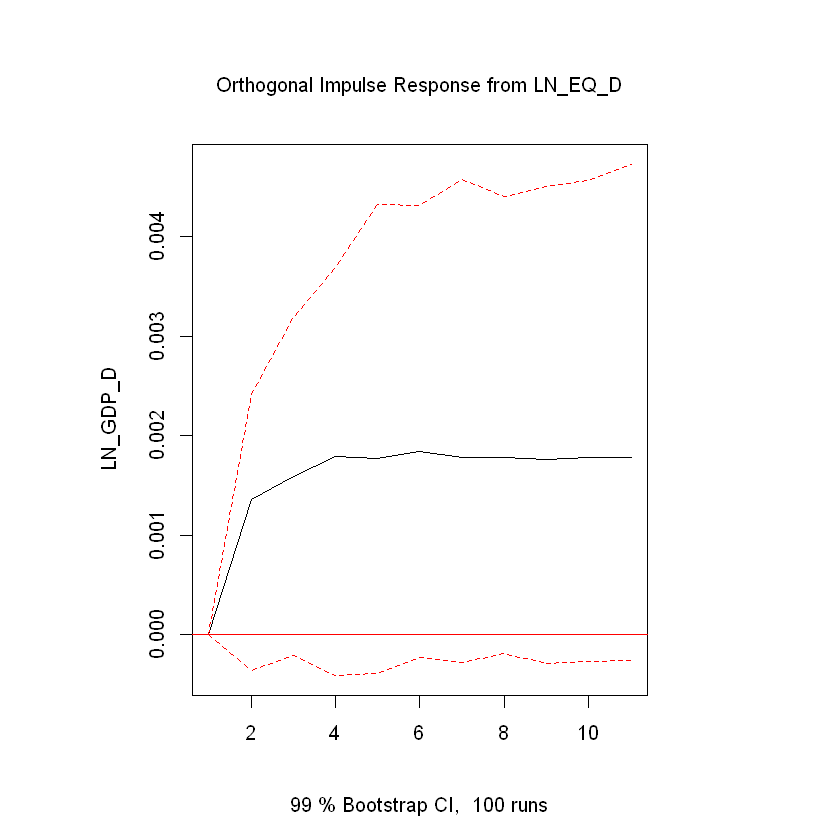

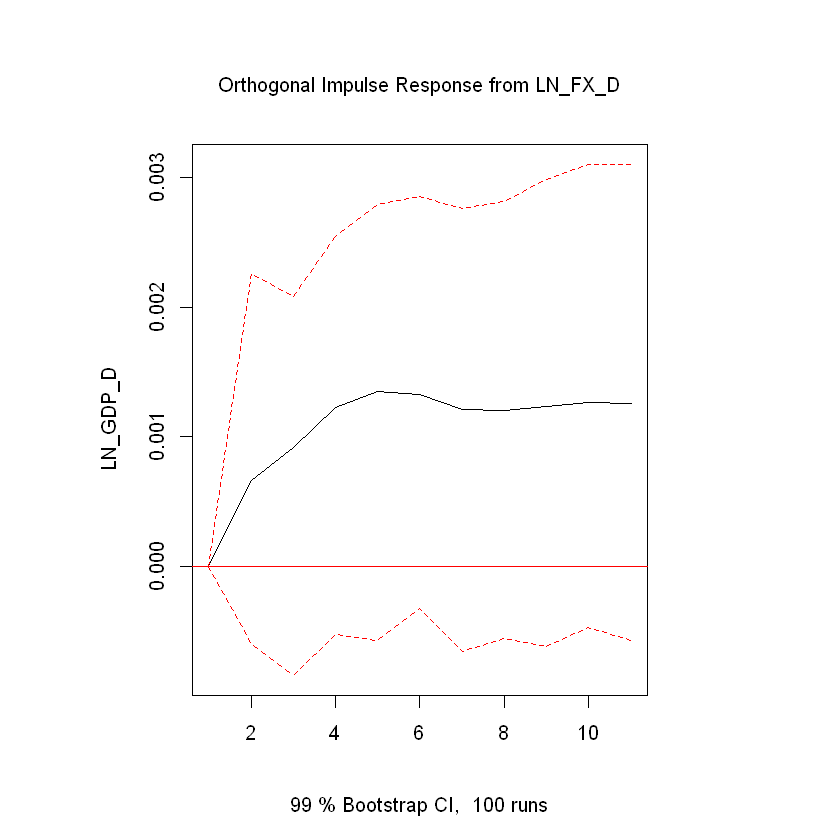

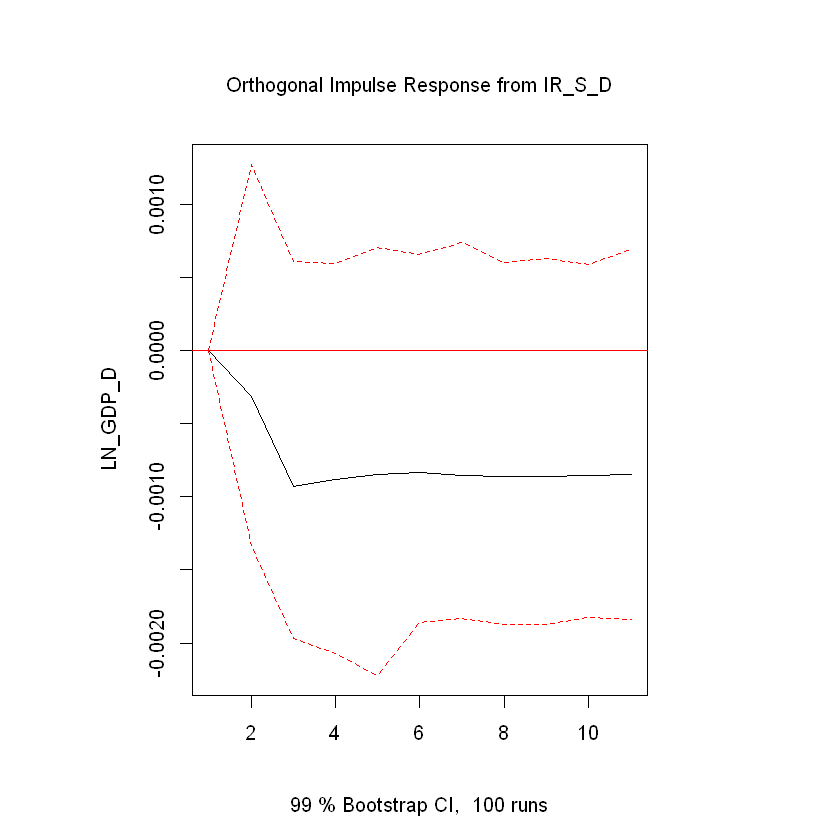

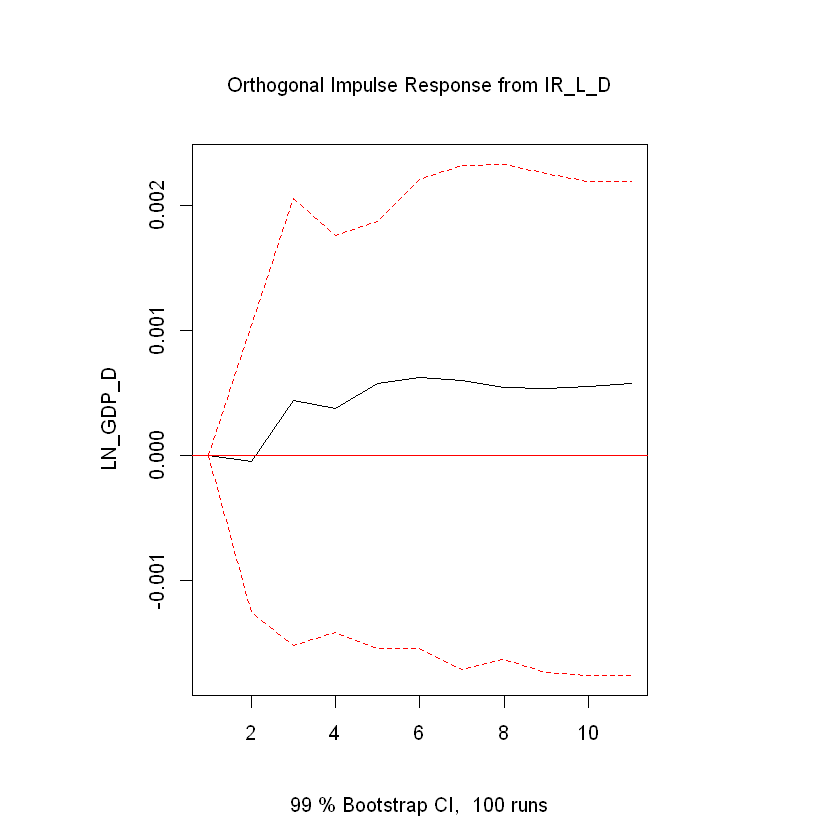

In [231]:
plot(irf_eq)
plot(irf_fx)
plot(irf_irs)
plot(irf_irl)